In [1]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = '108-42.aiff'

samples, sr = librosa.load(file, mono=False)
# Compute short-time Fourier Transform (stft)

# STFT

In [3]:
from scipy import signal

In [4]:
# VARIABLES
nperseg = 4500

channel = 2
t_i = 0
t_f = None
if t_f == None:
    t_f = sr * channel

    
# Setup
fs = sr
target_range = slice(t_i * fs ,t_f * fs)
x = samples[channel - 1][target_range]

# Run STFT
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg)

print(np.abs(Zxx).min(), np.abs(Zxx).max(), np.abs(Zxx).mean())
print(np.diff(t)[0])

3.846169e-14 0.03019345 8.1368526e-05
0.10204081632653061


### Visualization

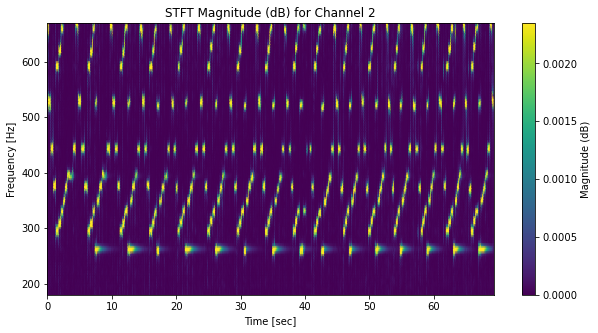

In [5]:
# VARIABLES
vmin = 0
vmax = np.abs(Zxx.max()) / 10
freq_min = 180 # in Hz, (196Hz is G3)
freq_max = 670 # in Hz, (659.3Hz is E5)

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=vmin, vmax=vmax, shading='gouraud')
plt.ylim([freq_min,freq_max])
plt.title(f'STFT Magnitude (dB) for Channel {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Magnitude (dB)')

# Pick Max Values

In [6]:
# Me finding the proper indicies
print(f[35]) # f min equiv
print(f[137]) # f max equiv

171.49999999999997
671.3


In [7]:
freq_min = 34  # 180 Hz equivalent
freq_max = 137 # 670 Hz equivalent

Zxx_abs = np.abs(Zxx)[:freq_max].T
freq_indicie = [np.argmax(Zxx_abs_ti) for Zxx_abs_ti in Zxx_abs]
freqs = [f[i] for i in freq_indicie]

Text(0.5, 0, 'Time (sec)')

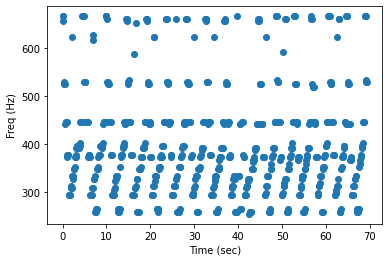

In [8]:
plt.scatter(t, freqs)
plt.ylabel('Freq (Hz)')
plt.xlabel('Time (sec)')

# Musical Phrase
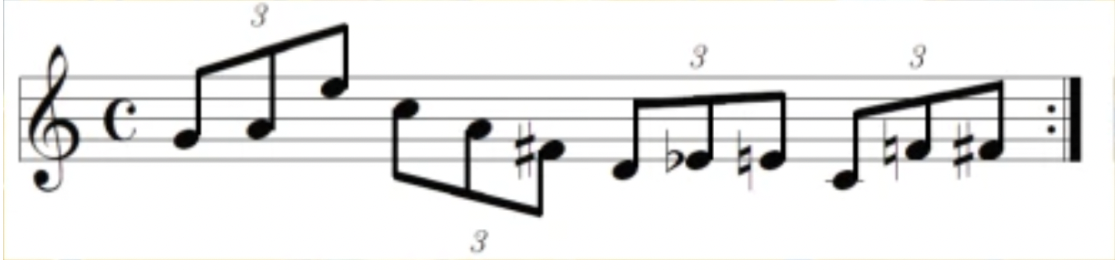

Text(0, 0.5, 'Freq (Hz)')

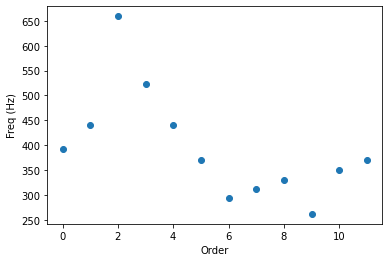

In [9]:
phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])
phrase_hz = librosa.note_to_hz(phrase)

notes_dict = dict(zip(phrase, phrase_hz))

plt.scatter(range(len(phrase_hz)), phrase_hz)
plt.xlabel('Order')
plt.ylabel('Freq (Hz)')

# Determining Letter Note Played

## Method #1: `librosa.hz_to_note`

In [10]:
notes = np.array([librosa.hz_to_note(freq, cents=False) for freq in freqs])
notes = np.where(np.isin(notes, phrase), notes, np.nan)

In [11]:
import matplotlib.colors as mcolors

def create_shading_between_colors(color1, color2, num_steps):
    cmap_colors = [color1, color2]
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, num_steps)
    return cmap

In [12]:
def select_color(i, note, notes):
    
    phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])
    
    cmap = create_shading_between_colors('blue', 'yellow', len(phrase))    
    
    if (note == 'A4'):
        if (notes[i - 1] == 'G4'):
            return cmap(1)
        elif (notes[i - 1] == 'C5'):
            return cmap(4)
        else:
            return None
    if (note == 'F♯4'):
        if (notes[i - 1] == 'A4'):
            return cmap(5)
        elif (notes[i - 1] == 'F4'):
            return cmap(11)
        else:
            return None
    else:
        indices = np.where(phrase == note)[0]
        color = cmap(indices)
        return color

# Plotting all Channels

680it [00:00, 1036.32it/s]
680it [00:00, 1366.15it/s]
680it [00:00, 1396.12it/s]
680it [00:00, 1593.62it/s]
680it [00:00, 1372.15it/s]
680it [00:00, 1839.15it/s]
680it [00:00, 1565.85it/s]
680it [00:00, 1383.46it/s]
680it [00:00, 2214.01it/s]
680it [00:00, 1793.60it/s]
680it [00:00, 2019.12it/s]
680it [00:00, 1483.07it/s]
680it [00:00, 1803.03it/s]
680it [00:00, 1746.15it/s]
680it [00:00, 1689.47it/s]
680it [00:00, 1572.64it/s]


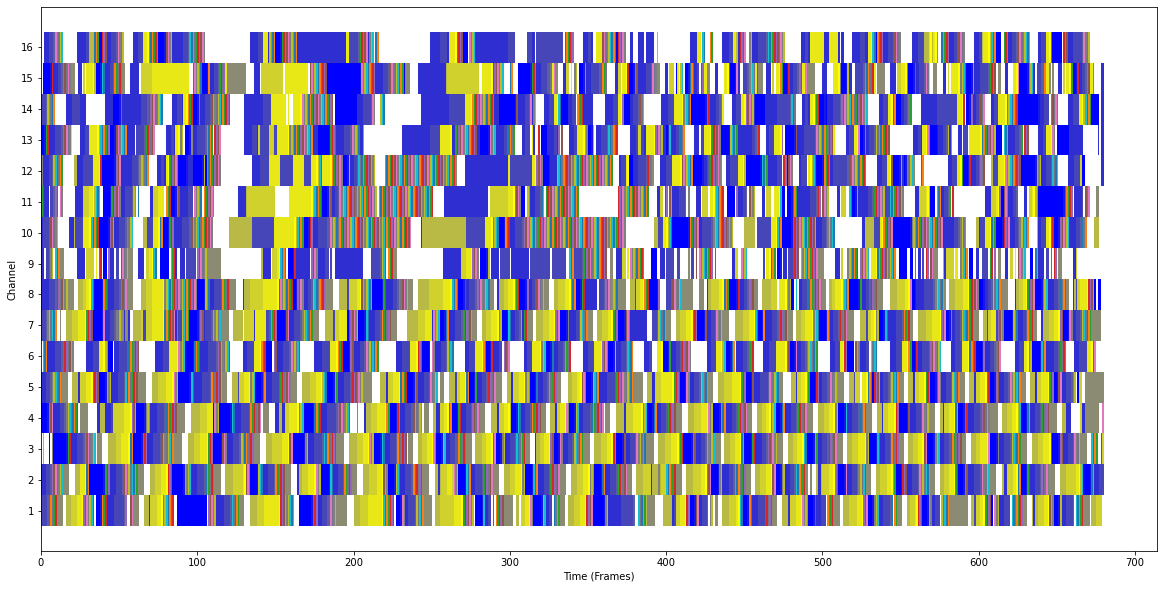

In [16]:
from tqdm import tqdm

# VARIABLES
freq_min = 34  # 180 Hz equivalent
freq_max = 137 # 670 Hz equivalent

nperseg = 4500

phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])

# Inital Plot
plt.figure(figsize=(20,10))

# Running through all channels
for channel, sample in enumerate(samples):
    channel += 1 # For naming convention
    
    # Short Term Fourier Transform
    fs = sr
    x = samples[channel - 1]
    f, t, Zxx = signal.stft(x, fs, nperseg=nperseg)
    
    # Get fundamental Frequencies
    Zxx_abs = np.abs(Zxx)[:freq_max].T
    freq_indicie = [np.argmax(Zxx_abs_ti) for Zxx_abs_ti in Zxx_abs]
    freqs = f[freq_indicie]
    
    # Get note form, 
    notes = []
    for freq in freqs:
        if freq != 0:
            hz = librosa.hz_to_note(freq, cents=False)
            notes.append(hz)
        else:
            notes.append(np.nan)
    notes = np.where(np.isin(notes, phrase), notes, np.nan)
    
    for i, note in tqdm(enumerate(notes)):
        if note != 'nan':
            plt.barh(y=f'{channel}', 
                     width=1,
                     height=1,
                     left = i,
                     color=select_color(i, note, notes))
            
plt.xlabel('Time (Frames)')
plt.ylabel('Channel')
plt.savefig('Max Values from STFT.png', dpi=600)
